In [5]:
import boto3
from matplotlib import pyplot as plt
import pandas as pd

In [6]:
with open('cred') as f:
    lines = f.readlines()
key_id = (lines[0])[:-1]
secret_key = lines[1]

In [7]:
s3_client = boto3.client('s3')
obj = s3_client.get_object(
    Bucket = 'truezhesha',
    Key = 'cur_df.csv'
)

df = pd.read_csv(obj['Body'])

In [8]:
df

,exchangedate,r030,cc,txt,enname,rate,units,rate_per_unit,group,calcdate,date
0,01.01.2021,840,USD,Долар США,US Dollar,28.2746,1,28.2746,1,30.12.2020,2021-01-01
1,01.01.2021,978,EUR,Євро,Euro,34.7396,1,34.7396,1,30.12.2020,2021-01-01
2,02.01.2021,978,EUR,Євро,Euro,34.7396,1,34.7396,1,30.12.2020,2021-01-02
3,02.01.2021,840,USD,Долар США,US Dollar,28.2746,1,28.2746,1,30.12.2020,2021-01-02
4,03.01.2021,840,USD,Долар США,US Dollar,28.2746,1,28.2746,1,30.12.2020,2021-01-03
...,...,...,...,...,...,...,...,...,...,...,...
725,29.12.2021,978,EUR,Євро,Euro,30.8401,1,30.8401,1,28.12.2021,2021-12-29
726,30.12.2021,840,USD,Долар США,US Dollar,27.2077,1,27.2077,1,29.12.2021,2021-12-30
727,30.12.2021,978,EUR,Євро,Euro,30.7760,1,30.7760,1,29.12.2021,2021-12-30
728,31.12.2021,978,EUR,Євро,Euro,30.9226,1,30.9226,1,30.12.2021,2021-12-31


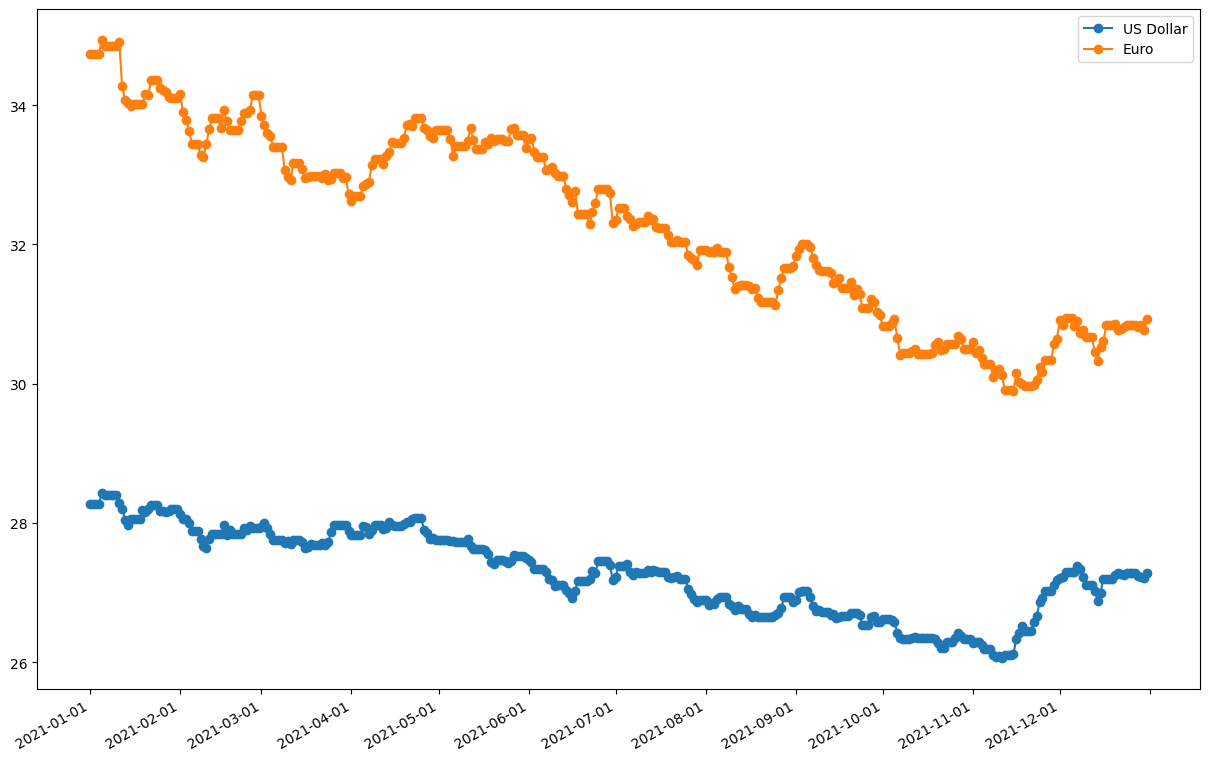

In [13]:
fig, ax = plt.subplots(figsize = (15, 10))
for name in df['enname'].unique():
    df_plot = df[df['enname']==name]
    ax.plot_date(df_plot['date'], df_plot['rate_per_unit'], fmt = '-o', label = name)
ax.legend()

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
     
months = mdates.MonthLocator()  

ax.xaxis.set_major_locator(months)
plt.savefig('graph.png')
fig.autofmt_xdate()
plt.show()